<a href="https://colab.research.google.com/github/a7madmostafa/CNN_MNIST/blob/main/DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True

In [3]:
# Load Data
(x_train, y_train),(x_test, y_test) = mnist.load_data(path="mnist.npz")

In [4]:
# Scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
# Model Building
model = Sequential([Flatten(),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')])

In [6]:
# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Fitting
history = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs=10, callbacks=[myCallback()])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4471 - accuracy: 0.8758 - val_loss: 0.1462 - val_accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1332 - accuracy: 0.9615 - val_loss: 0.1043 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9733 - val_loss: 0.0882 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0844 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0794 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0870 - val_accuracy: 0.9732
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0321 - accuracy: 0.9905 - val_loss: 0.0944 - val_accuracy:

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


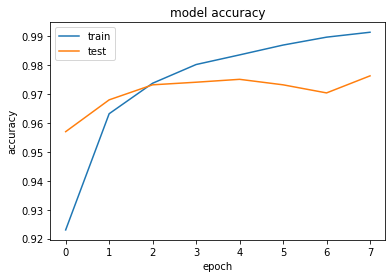

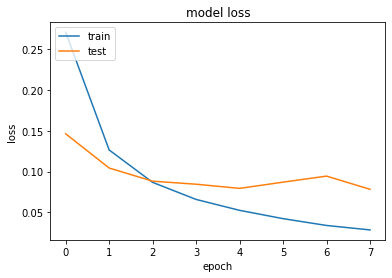

In [10]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
y_pred = np.argmax(model.predict(x_test), axis=-1) 
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9763


[0.0782197117805481, 0.9763000011444092]

In [21]:
confusion_matrix(y_test, y_pred)

array([[ 971,    1,    1,    0,    1,    0,    1,    0,    2,    3],
       [   0, 1123,    4,    2,    0,    0,    2,    0,    4,    0],
       [   6,    0,  999,    4,    3,    0,    2,    6,   11,    1],
       [   0,    0,    5,  986,    0,    3,    0,    3,    5,    8],
       [   2,    0,    0,    1,  955,    0,    5,    4,    1,   14],
       [   3,    0,    0,   16,    1,  859,    3,    1,    6,    3],
       [   6,    3,    3,    1,    3,    4,  932,    0,    6,    0],
       [   3,    3,   10,    3,    1,    0,    0,  997,    2,    9],
       [   6,    0,    3,    2,    1,    2,    1,    2,  951,    6],
       [   0,    4,    0,    3,    6,    3,    0,    0,    3,  990]])

In [22]:
accuracy_score(y_test, y_pred)

0.9763